## Training a model using logistic regression: TextBlob

In [45]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt

# Reading
Avengers_reviews = pd.read_csv("combined_datasets_sentiment.csv")

In [46]:
# lets train a model
from sklearn.model_selection import train_test_split

# Use 'textblob_sentiment' as the target variable for training and testing
X = Avengers_reviews['content_cleaned']
y = Avengers_reviews['sentiment_class_TB']

# Split the data
X_train, X_test, y_train_TB, y_test_TB = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_TB shape:", y_train_TB.shape)
print("y_test_TB shape:", y_test_TB.shape)

X_train shape: (4464,)
X_test shape: (1116,)
y_train_TB shape: (4464,)
y_test_TB shape: (1116,)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_TB)
# Predict on the test set
y_pred_TB = model.predict(X_test_tfidf)

# Evaluate the model
accuracy_TB = accuracy_score(y_test_TB, y_pred_TB)

# Detailed classification report
print(classification_report(y_test_TB, y_pred_TB))

              precision    recall  f1-score   support

    negative       1.00      0.50      0.67       163
     neutral       0.88      0.67      0.76       136
    positive       0.87      0.99      0.93       817

    accuracy                           0.88      1116
   macro avg       0.92      0.72      0.79      1116
weighted avg       0.89      0.88      0.87      1116



The model performs exceptionally well in predicting positive sentiment, with high precision and recall.
The model's precision is excellent for negative sentiment, but recall is relatively low, indicating that the model misses many actual negative reviews.
The performance for neutral sentiment is moderate, with balanced precision and recall, but there is room for improvement.

In [49]:
import re
# Import libraries for additional cleaning
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Import NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# lets check our model:
def clean(text, remove_digits=True):
    # 1. Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 2. Reemplazar 'RT ' y '&amp;'
    text = text.replace('RT ', ' ').replace('&amp;', 'and')
    # 3. Eliminar caracteres especiales, excepto alfanuméricos
    if remove_digits:
        pattern = r'[^a-zA-Z\s]'
    else:
        pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    # 4. Convertir a minúsculas
    text = text.lower()
    # 5. Eliminar menciones de Twitter, hashtags y emojis
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # 6. Eliminar números
    if remove_digits:
        text = re.sub(r'\d+', '', text)
    return text

# Removing commonly used words in english.
common_words = stopwords.words('english')

def add_cleaning(text):
    if not isinstance(text, str):
        return text
    # 5. Token
    text_tokens = word_tokenize(text.replace('’', "").lower())
    # 6. Delete punctuation
    tokens_without_p = [w for w in text_tokens if w.isalpha()]
    # 7. Delete stopwords
    tokens_without_stopwords = [t for t in tokens_without_p if t not in common_words]
    # 8. Lemmatization
    text_clean = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_stopwords]
    # Joining tokens in one string
    return " ".join(text_clean)
    
# Example new review
new_review = "This movie was bad! I hated every part of it."

# Preprocess the new review
cleaned_review = clean(new_review)
cleaned_review = add_cleaning(new_review)

# Vectorize the preprocessed review using the fitted vectorizer
new_review_tfidf = vectorizer.transform([cleaned_review])

# Predict the sentiment using the trained model
predicted_sentiment = model.predict(new_review_tfidf)

# Output the predicted sentiment
print(f"The predicted sentiment for the new review is: {predicted_sentiment[0]}")


The predicted sentiment for the new review is: negative


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Training the Vader model with logistic regression

In [51]:
# Use 'vader_sentiment' as the target variable for training and testing
X = Avengers_reviews['content_cleaned']
y = Avengers_reviews['sentiment_class_vader']

# Split the data
X_train, X_test, y_train_vader, y_test_vader = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_vader shape:", y_train_vader.shape)
print("y_test_vader shape:", y_test_vader.shape)

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train_vader)

# Predict on the test set
y_pred_vader = model.predict(X_test_tfidf)

# Evaluate the model
accuracy_vader = accuracy_score(y_test_vader, y_pred_vader)

# Detailed classification report
print(classification_report(y_test_vader, y_pred_vader))

# Example new review
new_review = "This movie was fantastic! I loved every part of it."

# Preprocess the new review
cleaned_review = clean(new_review)
cleaned_review = add_cleaning(new_review)

# Vectorize the preprocessed review using the fitted vectorizer
new_review_tfidf = vectorizer.transform([cleaned_review])

# Predict the sentiment using the trained model
predicted_sentiment = model.predict(new_review_tfidf)

# Output the predicted sentiment
print(f"The predicted sentiment for the new review is: {predicted_sentiment[0]}")
cleaned_review

X_train shape: (4464,)
X_test shape: (1116,)
y_train_vader shape: (4464,)
y_test_vader shape: (1116,)
              precision    recall  f1-score   support

    negative       0.90      0.55      0.69       170
     neutral       0.90      0.61      0.73       120
    positive       0.88      0.99      0.93       826

    accuracy                           0.88      1116
   macro avg       0.89      0.72      0.78      1116
weighted avg       0.89      0.88      0.87      1116

The predicted sentiment for the new review is: positive


'movie fantastic loved every part'

In [52]:
print("Comparison of VADER and TextBlob Sentiment Analysis:")
print(f"VADER Accuracy: {accuracy_vader:.4f}")
print(f"TextBlob Accuracy: {accuracy_TB:.4f}")

Comparison of VADER and TextBlob Sentiment Analysis:
VADER Accuracy: 0.8835
TextBlob Accuracy: 0.8808


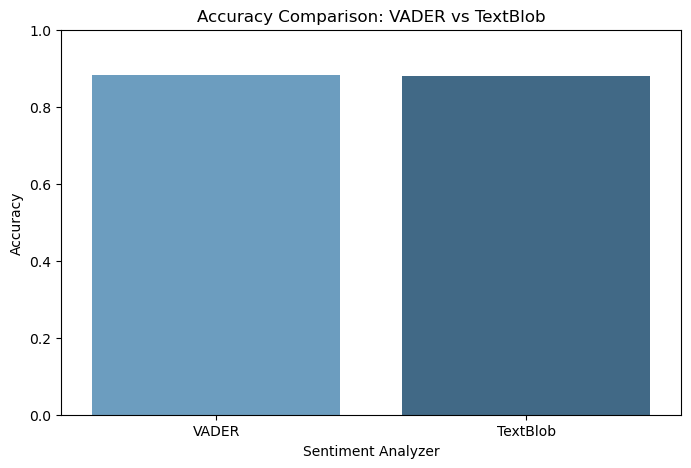

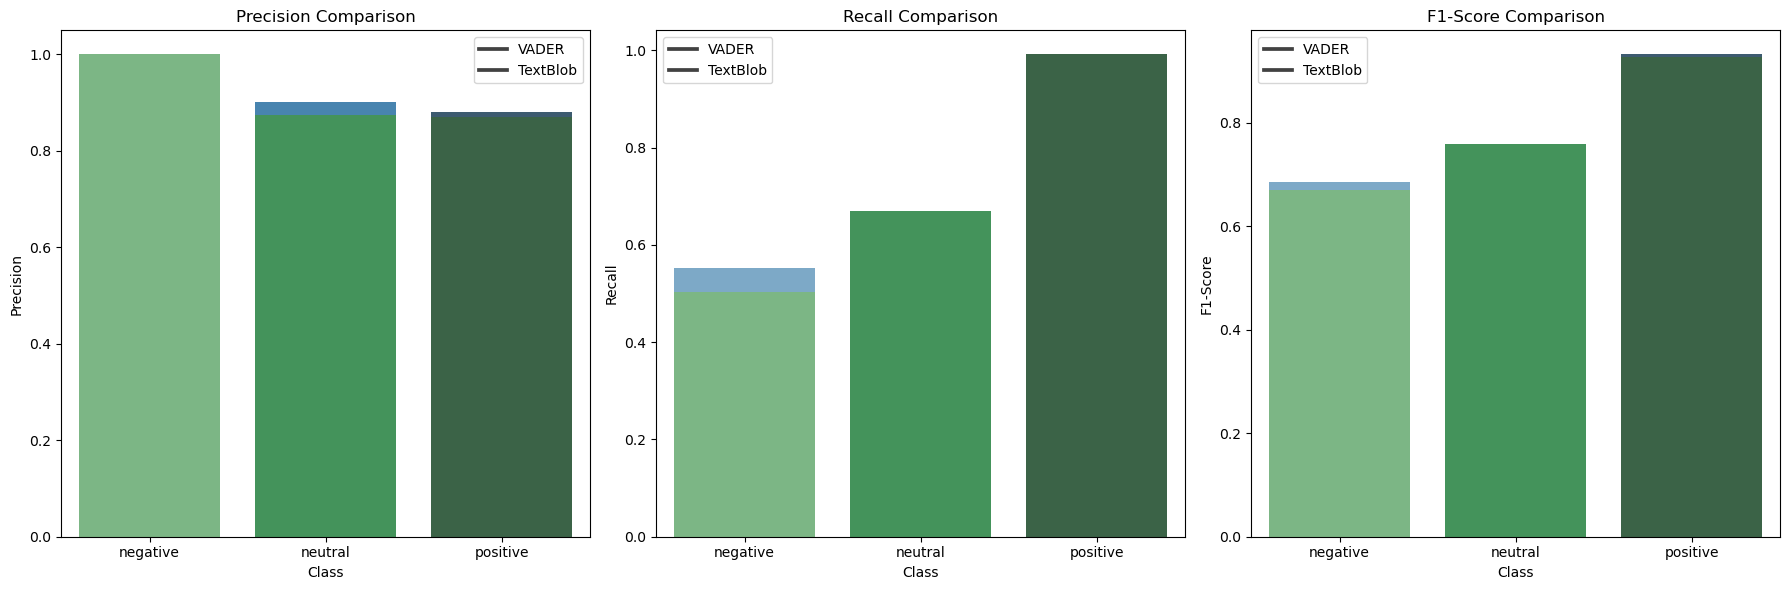

In [55]:
# Plotting the accuracy comparison
accuracy_data = pd.DataFrame({
    'Sentiment Analyzer': ['VADER', 'TextBlob'],
    'Accuracy': [accuracy_vader, accuracy_TB]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment Analyzer', y='Accuracy', data=accuracy_data, palette='Blues_d')
plt.title('Accuracy Comparison: VADER vs TextBlob')
plt.ylabel('Accuracy')
plt.xlabel('Sentiment Analyzer')
plt.ylim(0, 1)
plt.show()

# Plotting the classification report for VADER
vader_report = classification_report(y_test_vader, y_pred_vader, output_dict=True)
vader_report_df = pd.DataFrame(vader_report).transpose()

# Plotting the classification report for TextBlob
textblob_report = classification_report(y_test_TB, y_pred_TB, output_dict=True)
textblob_report_df = pd.DataFrame(textblob_report).transpose()

# Combined bar plots for precision, recall, and f1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x=vader_report_df.index[:-3], y=vader_report_df['precision'][:-3], ax=axes[0], palette='Blues_d')
sns.barplot(x=textblob_report_df.index[:-3], y=textblob_report_df['precision'][:-3], ax=axes[0], palette='Greens_d')
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision')
axes[0].set_xlabel('Class')
axes[0].legend(['VADER', 'TextBlob'])

sns.barplot(x=vader_report_df.index[:-3], y=vader_report_df['recall'][:-3], ax=axes[1], palette='Blues_d')
sns.barplot(x=textblob_report_df.index[:-3], y=textblob_report_df['recall'][:-3], ax=axes[1], palette='Greens_d')
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall')
axes[1].set_xlabel('Class')
axes[1].legend(['VADER', 'TextBlob'])

sns.barplot(x=vader_report_df.index[:-3], y=vader_report_df['f1-score'][:-3], ax=axes[2], palette='Blues_d')
sns.barplot(x=textblob_report_df.index[:-3], y=textblob_report_df['f1-score'][:-3], ax=axes[2], palette='Greens_d')
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')
axes[2].set_xlabel('Class')
axes[2].legend(['VADER', 'TextBlob'])

plt.tight_layout()
plt.show()
